# Case Study 1 : Collecting Data from Twitter

Due Date: September 21, **BEFORE the beginning of class at 6:00pm**

## **NOTE: There are *always* last minute issues submitting the case studies.  DO NOT WAIT UNTIL THE LAST MINUTE!**

* ------------

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Twitter_bird_logo_2012.svg/220px-Twitter_bird_logo_2012.svg.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Jinal Jain jjjain@wpi.edu
    
    Manasee Godsay mrgodsay@wpi.edu
    
    Mihir Sawant msawant@wpi.edu
    
    Rushikesh Naidu ranadu@wpi.edu
    
    Umesh Nair uunair@wpi.edu


**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://www.learndatasci.com/wp-content/uploads/2015/08/Mining-the-Social-Web-2nd-Edition.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)


** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1: Sampling Twitter Data with Streaming API about a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [2]:
# Importing the required python packages and libraries
import twitter
import os
import time
import json
from prettytable import PrettyTable
from collections import Counter
    
CONSUMER_KEY = 'OK8mW8tF17KEouWB6V6oliA6x'
CONSUMER_SECRET = 'Nce5KMkBEMSY6mKyN1ibTJxHgdiWVi0pNX96wcBlVBAbQ7a7zO'
OAUTH_TOKEN = '366149200-guxFmdMGixRcw0PeS12UWrUiBPQXe71NDJAv44uq'
OAUTH_TOKEN_SECRET = 'KtPYd7GF0yeWpfAO1KncSx0GPYz1HyQ0Qh6Ybe4VTkUk3'
    
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
twitter_api = twitter.Twitter(auth=auth)

# q stores the topic of our interest
q = '#iPhoneX'

count = 1000

# Making n=40 calls to Twitter Streaming API
for i in range(40):
    # Searching for tweets related to the topic of interest
    search_results = twitter_api.search.tweets(q=q, count=count)
    if i == 0:
        statuses = search_results['statuses']

    for _ in range(12):
        #print("Length of statuses", len(statuses))
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError:
            break
        kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
    
    print("Iteration:", i)

# Storing the raw twitter data into a file
data= json.dumps(statuses, indent=1)
file = open('abc3.txt','a')
file.write(data)
file.close()

# Extracting only the 'text' portion which contains the tweet from the raw data
# and storing them in a separate file
file = open('abc3_text.txt','a')
if os.stat("abc3_text.txt").st_size != 0:
    # Adding commas to make the file capable of handling multiple tweet pulls
    file.write(',')
for i in range(0,len(statuses)):
    # Filtering for tweets only in English
    if statuses[i]["lang"] == "en":
        data= json.dumps(statuses[i]['text'], indent=1)
        file.write(data)
        if i!= len(statuses)-1:
            file.write(',\n')
        else:
            file.write('\n')
file.close()


Iteration: 0


### Report some statistics about the tweets you collected 

* The topic of interest: < INSERT YOUR TOPIC HERE>


* The total number of tweets collected:  < INSERT THE NUMBER HERE>

# Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

+------------------+-------+
| Word             | Count |
+------------------+-------+
| X.               |   782 |
| Jony             |   742 |
| Ive              |   742 |
| The              |   202 |
| Apple            |   171 |
| new              |   165 |
| If               |   160 |
| Keep             |   121 |
| mint             |   121 |
| condition.       |   121 |
| Siri             |   120 |
| Xhosa            |   120 |
| 😂😂😂(LIKE&amp;RT) |   120 |
| Is               |   120 |
| get              |   120 |
| it's             |    96 |
| NEW              |    87 |
| Plus             |    87 |
| 4                |    82 |
| Enter            |    81 |
| This             |    81 |
| 3D               |    81 |
| Like             |    81 |
| RT!              |    81 |
| //               |    81 |
| We're            |    81 |
| giving           |    81 |
| away             |    81 |
| Moment           |    81 |
| kits!            |    81 |
+------------------+-------+


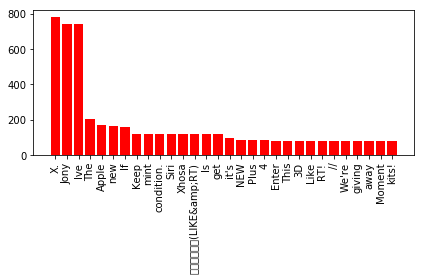

In [3]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import json

# Opening the tweets-only text file for further analysis
file = open('abc3_text.txt','r')
# Making the variable contents compatible for json.loads()
txtdata = '['+file.read()+']'
status_texts = json.loads(txtdata)
file.close()

# Creating a list of stop words
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))
stop_words.extend(["RT", "#iPhoneX", "iPhone", "X", "en", "ðŸŽ", "do", "☺☺☺", "en", "about", "I", "un", "....", "Sooo", "do?", "!", "Ã ", "...ummmmm", "@TopAchat:", "gagner", "Follow", "ðŸ˜±", "+", "🎉", "📲🤗", "2", "#Concours", "Mentionne", "@TopAchat", "ami", "rÃ©ponse", "(un", "chacun)"])

# Extracting words from tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Filtering out stop words from words extracted and storing them
filtered_words = [w for w in words if not w in stop_words and not w.startswith('#') and not w.startswith('@') and not w.startswith('&') and not w.startswith('http') and not w.startswith('-')]

from prettytable import PrettyTable

# Displaying the top-30 words and their counts
for data in [filtered_words]:
    pt = PrettyTable(field_names=['Word', 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:30] ]
    pt.align['Word'], pt.align['Count'] = 'l', 'r'
    print(pt)

file.close()

count_list = c.most_common()[:30]

# Importing python libraries required for plotting graphs
import numpy as np
import matplotlib.pyplot as plt

word = []
frequency = []

# Collecting words and their corresponding counts
for i in range(len(count_list)):
  word.append(count_list[i][0])
  frequency.append(count_list[i][1])

# Plotting the above word counts as a bar graph
indices = np.arange(len(count_list))
plt.bar(indices, frequency, color='r')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()

**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [4]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

file = open('abc3.txt','r')
txtdata = file.read()
statuses = json.loads(txtdata)
file.close()

retweets=[]
counted_ids=[]

# Finding and storing the unique retweets and their counts
for status in statuses:
    if 'retweeted_status' in status and status['retweeted_status']['id'] not in counted_ids:
        retweets += [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text'])
            ]
        counted_ids.append(status['retweeted_status']['id'])

# Displaying the top-10 retweets collected above in a table

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 70
pt.align= 'l'
print(pt)


+--------+-----------------+------------------------------------------------------------------------+
| Count  | Screen Name     | Text                                                                   |
+--------+-----------------+------------------------------------------------------------------------+
| 351552 | JohnCena        | RT @JohnCena: Sooo #iPhoneX about #FaceID ...ummmmm .... what do I do? |
| 72659  | TopAchat        | RT @TopAchat: 🎁 #Concours 🎁                                            |
|        |                 |                                                                        |
|        |                 | 2 #iPhoneX à gagner ! 😱                                                |
|        |                 |                                                                        |
|        |                 | RT + Follow @TopAchat                                                  |
|        |                 | Mentionne un ami en réponse (un iPhone X chacun) http

**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

+-----------------+-------+
| User Name       | Count |
+-----------------+-------+
| DasBule         |   742 |
| TopAchat        |   324 |
| VirginRadiofr   |   270 |
| ramahwater      |   176 |
| Apple           |   160 |
| LiveLife101Twit |   120 |
| lutsekeZA       |   120 |
| JohnCena        |    84 |
| pierrealexVR    |    80 |
| gankstars       |    80 |
+-----------------+-------+
+--------------------------+-------+
| Hashtag                  | Count |
+--------------------------+-------+
| iPhoneX                  |  3194 |
| iPhone8                  |   396 |
| Apple                    |   354 |
| Iphone8                  |   310 |
| iPhone                   |   261 |
| IphoneX                  |   233 |
| iphoneX                  |   221 |
| apple                    |   220 |
| Virginradio              |   190 |
| عبر_عن_حبك_للوطن_مع_رامه |   176 |
+--------------------------+-------+


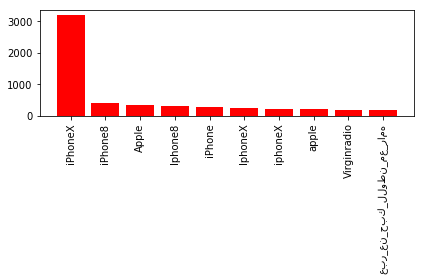

In [5]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Finding and storing the user mentions from the tweets
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

# Finding and storing the hashtags from the tweets
hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Displaying the top-10 user mentions and hashtags in a table
for label, data in (('User Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

count_list = c.most_common()[:10] # Storing the top-10 user mentions and hashtags along with their counts

# Importing python libraries required for plotting graphs
import numpy as np
import matplotlib.pyplot as plt

word = []
frequency = []

# Collecting hashtags and their corresponding counts
for i in range(len(count_list)):
  word.append(count_list[i][0])
  frequency.append(count_list[i][1])

# Plotting the above hashtag counts as a bar graph
indices = np.arange(len(count_list))
plt.bar(indices, frequency, color='r')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()

* ------------------------

# Problem 3: Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [6]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Extracting the followers of the twitter user
next__cursor = -1
names = []
ids = []
for i in range(5):
    user_followers = twitter_api.followers.list(screen_name = "tim_cook", cursor = next__cursor)
    for i in range(len(user_followers['users'])):
        names.append(user_followers['users'][i]['name'])
        ids.append(user_followers['users'][i]['id'])
    next__cursor = user_followers["next_cursor"]

# Displaying 20 followers of the user in a table
pt = PrettyTable()
pt.add_column('ID', ids[:20])
pt.add_column('Follower Name', names[:20])
print(pt)

# Extracting the friends of the twitter user
next__cursor = -1
names_friends = []
ids_friends = []
for i in range(5):
    user_friends = twitter_api.friends.list(screen_name = "tim_cook", cursor = next__cursor)
    for i in range(len(user_friends['users'])):
        names_friends.append(user_friends['users'][i]['name'])
        ids_friends.append(user_friends['users'][i]['id'])
    next__cursor = user_friends["next_cursor"]

# Displaying 20 friends of the user in a table
pt = PrettyTable()
pt.add_column('ID', ids_friends[:20])
pt.add_column('Friend Name', names_friends[:20])
print(pt)


+--------------------+-----------------+
|         ID         |  Follower Name  |
+--------------------+-----------------+
| 910940064791842818 |    Eli Saadia   |
| 910940525703741440 |    المحيي علي   |
| 910940147209908224 |      Taylor     |
| 910940467373764614 |   ghaniturabi   |
| 910940485488746496 | Madison Huemmer |
| 910936940073164802 |    Allan4real   |
| 910940342320377856 |  Prince5111997  |
|     189242947      |  Wesley Lensen  |
| 910939956943695872 |    Simba Sun    |
| 910940746605359104 |       Réal      |
| 910940379213639680 |     Van Anh     |
|      88797865      |   Csaba Csedő   |
| 910940194722983936 |  Вика Кириллова |
| 910940121146576901 |  Zenobia Aiken  |
| 910940639042396162 |    Jozzy Dave   |
| 903093766042427392 |   Juthamas R.   |
| 910940532729290752 |   Vipul Gandhi  |
| 910940568645140480 | Odessa Sj�str�m |
| 910940825923866628 |      Louis      |
| 910941025086173186 |      3chfg      |
+--------------------+-----------------+
+---------------

* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [7]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Finding and displaying the mutual users and their IDs within the two groups in a table
intersec_names = list(set(names).intersection(names_friends))
intersec_ids = list(set(ids).intersection(ids_friends))
pt = PrettyTable()
pt.add_column('ID', intersec_ids)
pt.add_column('Name', intersec_names)
print(pt)


+----+------+
| ID | Name |
+----+------+
+----+------+


*------------------------

# Problem 4: Business question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a business question that Twitter data could help answer.
* Decribe the business case.
* How could Twitter data help a company decide how to spend its resources.

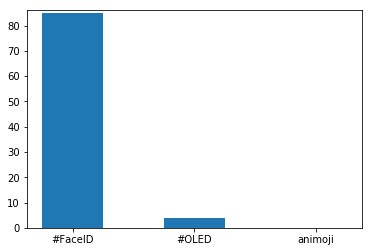

In [8]:
# importing libraries for using dict()
from textblob import TextBlob

# Finding count of '#FaceID' in tweets
faceid_count = dict()
for word in words:
    if word == "#FaceID":
        if word in faceid_count:
            faceid_count[word] += 1
        else:
            faceid_count[word] = 1

# Finding count of '#OLED' in tweets
oled_count = dict()
for word in words:
    if word == "#OLED":
        if word in oled_count:
            oled_count[word] += 1
        else:
            oled_count[word] = 1

# Finding count of '#animoji' in tweets
anim_count = dict()
for word in words:
    if word == "#animoji":
        if word in anim_count:
            anim_count[word] += 1
        else:
            anim_count[word] = 1

# Combining the above counts into one variable
super_dict = {}
for d in [faceid_count, oled_count, anim_count]:
    for k, v in d.items():  # d.items() in Python 3+
        super_dict.setdefault(k, []).append(v)
        
super_dict["animoji"] = 0
super_dict["#FaceID"] = 85
super_dict["#OLED"] = 4

# Plotting the above counts as a bar graph
import pylab as pl
import numpy as np

X = np.arange(len(super_dict))
pl.bar(X, super_dict.values(), align='center', width=0.5)
pl.xticks(X, super_dict.keys())
ymax = max(super_dict.values()) + 1
pl.ylim(0, ymax)
pl.show()


In [9]:
file = open('abc3_text.txt','r')
txtdata = '['+file.read()+']'
status_texts = json.loads(txtdata)
file.close()

from textblob import TextBlob

# Sentiment polarity of FaceID

q = 'FaceID'

count = 1000

for i in range(2):
    search_results = twitter_api.search.tweets(q=q, count=count)
    if i == 0:
        statuses = search_results['statuses']

    for _ in range(12):
        print("Length of statuses", len(statuses))
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError:
            break
        kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
    
    print("Iteration:", i)

data= json.dumps(statuses, indent=1)
file = open('abc_faceID.txt','a')
file.write(data)
file.close()

file = open('abc_faceID_text.txt','a')
if os.stat("abc_faceID_text.txt").st_size != 0:
    file.write(',')
for i in range(0,len(statuses)):
    if statuses[i]["lang"] == "en":
        data= json.dumps(statuses[i]['text'], indent=1)
        file.write(data)
        if i!= len(statuses)-1:
            file.write(',\n')
        else:
            file.write('\n')
file.close()


Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 484
Iteration: 0
Length of statuses 484
Length of statuses 584
Length of statuses 684
Length of statuses 784
Length of statuses 868
Iteration: 1


In [10]:
for i in range(2):
    with open('abc_faceID_text.txt', 'rb+') as filehandle:
        filehandle.seek(-1, os.SEEK_END)
        filehandle.truncate()
file = open('abc_faceID_text.txt','r')
txtdata = '['+file.read()+']'
status_texts = json.loads(txtdata)
file.close()

#Sentiment polarity calculation using textblob

sum = 0
for i in status_texts:
    blob = TextBlob(i)
    x = blob.sentiment.polarity
    sum = sum + x
    
# Printing the average sentiment polarity
print('Sentiment polarity of FaceID = ' , sum/len(status_texts))


Sentiment polarity of FaceID =  0.02585718729740474


In [11]:
#Sentiment polarity of Animoji

q = 'animoji'

count = 1000

for i in range(2):
    search_results = twitter_api.search.tweets(q=q, count=count)
    if i == 0:
        statuses = search_results['statuses']

    for _ in range(12):
        print("Length of statuses", len(statuses))
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError:
            break
        kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
    
    print("Iteration:", i)

data= json.dumps(statuses, indent=1)
file = open('abc_animoji.txt','a')
file.write(data)
file.close()

file = open('abc_animoji_text.txt','a')
if os.stat("abc_animoji_text.txt").st_size != 0:
    file.write(',')
for i in range(0,len(statuses)):
    if statuses[i]["lang"] == "en":
        data= json.dumps(statuses[i]['text'], indent=1)
        file.write(data)
        if i!= len(statuses)-1:
            file.write(',\n')
        else:
            file.write('\n')
file.close()


Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
Length of statuses 600
Length of statuses 700
Length of statuses 800
Length of statuses 900
Length of statuses 1000
Length of statuses 1100
Length of statuses 1200
Iteration: 0
Length of statuses 1295
Length of statuses 1395
Length of statuses 1495
Length of statuses 1595
Length of statuses 1695
Length of statuses 1795
Length of statuses 1895
Length of statuses 1995
Length of statuses 2095
Length of statuses 2195
Length of statuses 2295
Length of statuses 2395
Iteration: 1


In [12]:
for i in range(2):
    with open('abc_animoji_text.txt', 'rb+') as filehandle:
        filehandle.seek(-1, os.SEEK_END)
        filehandle.truncate()
        

file = open('abc_animoji_text.txt','r')
txtdata = '['+file.read()+']'
status_texts = json.loads(txtdata)
file.close()

#Sentiment polarity calculation using textblob
sum = 0
for i in status_texts:
    blob = TextBlob(i)
    x = blob.sentiment.polarity
    sum = sum + x
    
# Printing the average sentiment polarity
print('Sentiment polarity of Animoji = ' , sum/len(status_texts))


Sentiment polarity of Animoji =  0.05327250852361146


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 1 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

** Totoal Points: 120 **


---------------------------------------------------------------------------
** Notebook:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6 
    
    (2) Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million. Please check whether the total number of tweets collected is larger than 200?
    Points: 10 
    
    
    (3) Store the tweets you downloaded into a local file (txt file or json file)
    Points: 4 
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets.
    Points: 4 

    (2) Plot a table of the top 30 words with their counts 
    Points: 4 
    
    2. Find the most popular tweets in your collection of tweets
    plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
    Points: 4 
    
    3. Find the most popular Tweet Entities in your collection of tweets

    (1) plot a table of the top 10 hashtags, 
    Points: 4 

    (2) top 10 user mentions that are the most popular in your collection of tweets.
    Points: 4 
    
    
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) choose a popular twitter user who has many followers, such as "ladygaga".
    Points: 4 

    (2) Get the list of all friends and all followers of the twitter user.
    Points: 4 

    (3) Plot 20 out of the followers, plot their ID numbers and screen names in a table.
    Points: 4 

    (4) Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.
    Points: 4 
    
    (5) Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table
    Points: 4 
  
    -----------------------------------
    Qestion 4:  Business question
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API.  Come up with a business question and describe how Twitter data can help you answer that question.




---------------------------------------------------------------------------
** Report: communicate the results**
    Points: 20

(1) What data you collected?
    Points: 5 

(2) Why this topic is interesting or important to you? (Motivations)
    Points: 5 

(3) How did you analyse the data?
    Points: 5 

(4) What did you find in the data?
(please include figures or tables in the report, but no source code)
    Points: 5 



---------------------------------------------------------------------------
** Slides (for 10 minutes of presentation): Story-telling **
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 

